## CoverMyMeds Project

At CoverMyMeds, time series analysis forms the backbone of the financial projections we make at the beginning of each fiscal year and helps us set realistic but challenging company goals.  Many of our products have multiple customers whose behaviors might (or might not) influence each other.  We are presenting daily volume (can be thought of as purchases) of one product for three customers. Questions that you should answer in this project are the following: 
* What trends are in the data at the daily, monthly, and yearly levels?
* What variables do and do not affect daily volume?
* How does the behavior of one customer affect the behavior of the other customers?
* How accurately can you predict what will happen in 2019 at the monthly and yearly levels?
* How accurate are your projections 1 month, 3 months, and 6 months after the  day they were forecasted from?


## import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## load data set
<br>inspections:
   1. print information about the data set use df.info()
   2. print first few lines of the data set

In [2]:
df=pd.read_parquet('..//data//cmm_erdos_bootcamp_2020_timeseries.pq', engine='pyarrow')

### Inspection of the data

In [3]:
# data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
date_val          1095 non-null object
calendar_year     1095 non-null int64
calendar_month    1095 non-null int64
calendar_day      1095 non-null int64
day_of_week       1095 non-null int64
is_weekday        1095 non-null int64
is_workday        1095 non-null int64
is_holiday        1095 non-null int64
volume_A          1095 non-null int64
volume_B          1095 non-null int64
volume_C          1095 non-null int64
dtypes: int64(10), object(1)
memory usage: 94.2+ KB


In [4]:
# first a few rows of the data set
df.head()

date_val  calendar_year  calendar_month  calendar_day  day_of_week  \
0  2017-01-01           2017               1             1            1   
1  2017-01-02           2017               1             2            2   
2  2017-01-03           2017               1             3            3   
3  2017-01-04           2017               1             4            4   
4  2017-01-05           2017               1             5            5   

   is_weekday  is_workday  is_holiday  volume_A  volume_B  volume_C  
0           0           0           1       974       701       574  
1           1           0           0      5073      2976      3149  
2           1           1           0      6710      4249      3595  
3           1           1           0      5746      3942      3651  
4           1           1           0      5863      4279      3792

### Add a new column for the English words for weekdays 
* map 'day_of_week' to Monday, Tuesday, etc.

In [5]:
df['Day_of_week']=df['day_of_week'].map({1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"})
df.head()

date_val  calendar_year  calendar_month  calendar_day  day_of_week  \
0  2017-01-01           2017               1             1            1   
1  2017-01-02           2017               1             2            2   
2  2017-01-03           2017               1             3            3   
3  2017-01-04           2017               1             4            4   
4  2017-01-05           2017               1             5            5   

   is_weekday  is_workday  is_holiday  volume_A  volume_B  volume_C  \
0           0           0           1       974       701       574   
1           1           0           0      5073      2976      3149   
2           1           1           0      6710      4249      3595   
3           1           1           0      5746      3942      3651   
4           1           1           0      5863      4279      3792   

  Day_of_week  
0      Sunday  
1      Monday  
2     Tuesday  
3   Wednesday  
4    Thursday

### Holidays extractions

In [6]:
holiday=pd.concat([pd.DataFrame(df[(df['is_holiday']==1)&(df['calendar_year']==2017)]['date_val'].values),
                   pd.DataFrame(df[(df['is_holiday']==1)&(df['calendar_year']==2018)]['date_val'].values),
                   pd.DataFrame(df[(df['is_holiday']==1)&(df['calendar_year']==2019)]['date_val'].values)],
                  axis=1,ignore_index=True)
holiday.columns=['2017 Holiday','2018 Holiday','2019 Holiday']
holiday.rename( index={0: 'New Year',1: 'Memorial Day',2: 'Independence Day',3:'Labor day',4:'Thanks giving',5:'Christmas'}, inplace=True)
holiday

2017 Holiday 2018 Holiday 2019 Holiday
New Year           2017-01-01   2018-01-01   2019-01-01
Memorial Day       2017-05-29   2018-05-28   2019-05-27
Independence Day   2017-07-04   2018-07-04   2019-07-04
Labor day          2017-09-04   2018-09-03   2019-09-02
Thanks giving      2017-11-23   2018-11-22   2019-11-28
Christmas          2017-12-25   2018-12-25   2019-12-25

## plot original data

f:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


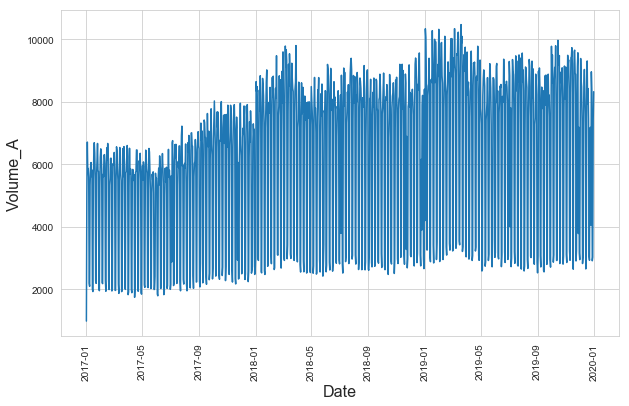

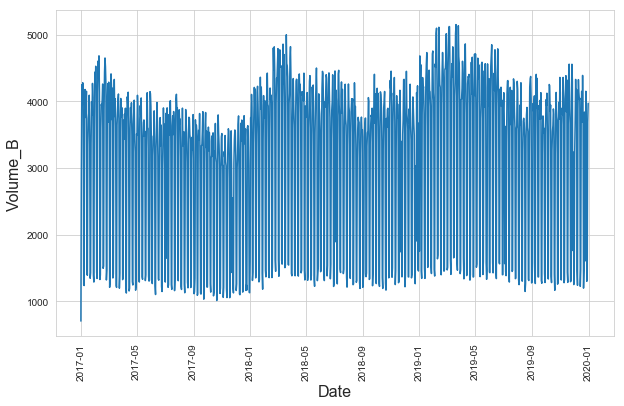

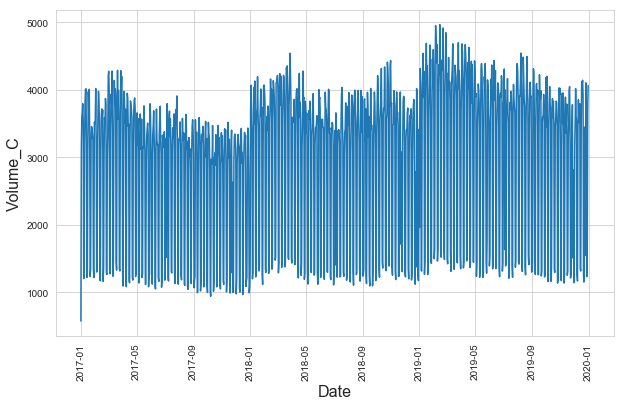

In [7]:
# matplotlib does a good job handling
# datetime data
plt.figure(figsize=(10,6))

plt.plot(df.date_val, df.volume_A)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Volume_A", fontsize=16)

plt.xticks(rotation=90)

plt.figure(figsize=(10,6))

plt.plot(df.date_val, df.volume_B)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Volume_B", fontsize=16)

plt.xticks(rotation=90)

plt.figure(figsize=(10,6))

plt.plot(df.date_val, df.volume_C)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Volume_C", fontsize=16)

plt.xticks(rotation=90)

plt.show()

### Plotting tools to fine select the data

In [8]:
def plotter(df,x,y,xlabel,ylabel,constrainflag=False,constrain=''):
    if constrainflag:
        x=df[constrain][x]
        y=df[constrain][y]
    else:
        x=df[x]
        y=df[y]
    plt.figure(figsize=(10,6))

    plt.plot(x, y)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.xticks(rotation=90)
    plt.show()

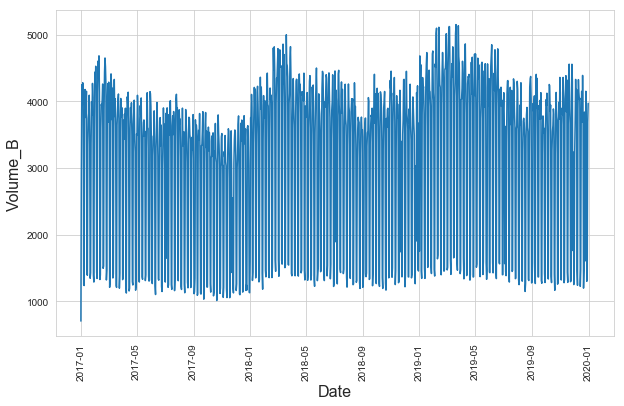

In [9]:
#plotter(df,"date_val","volume_A","Date","Volume_A",True,df['calendar_month']==2)
plotter(df,"date_val","volume_B","Date","Volume_B")

## Decompose trend
* smooth data with certain window size
    1. workdays of first month: 22

### Define tools to decompose trend

In [10]:
import statsmodels.api as sm
import matplotlib
def seasonal_decompose(df,model,freq):
    decomposition = sm.tsa.seasonal_decompose(df,model=model,freq=freq,extrapolate_trend='freq')
    fig=decomposition.plot()

def seasonal_decompose_data(df,model,freq):
    decomposition = sm.tsa.seasonal_decompose(df,model=model,freq=freq,extrapolate_trend='freq')
    return decomposition
    
def seasonal_plotter(customer,day_include,flag=1):
    # please define df = pd.read_parquet('cmm_erdos_bootcamp_2020_timeseries.pq', engine='pyarrow')
    # option for customer: 'volume_A','volume_B','volume_C'
    # option for day_include: 'all', 'weekday','workday', 'holiday'
    # usage eg: seasonal_plotter('volume_A','all',True)
    
    workday_num=253
    weekday_num=261
    ind_dct={"all":0,"weekday":1,"workday":2,'holiday':3}
    ind=ind_dct[day_include]
    if ind == 0:
        seasonal_decompose(df[[customer]],'additive',7)
        seasonal_decompose(df[[customer]],'additive',30)
        seasonal_decompose(df[[customer]],'additive',365)
        seasonal_decompose(df[[customer]],'multiplicative',7)
        seasonal_decompose(df[[customer]],'multiplicative',30)
        seasonal_decompose(df[[customer]],'multiplicative',365)
    elif ind == 1:
        seasonal_decompose(df[df['is_weekday']==flag][[customer]],'additive',5 if flag==1 else 1)
        seasonal_decompose(df[df['is_weekday']==flag][[customer]],'additive',30)
        seasonal_decompose(df[df['is_weekday']==flag][[customer]],'additive',weekday_num)
        seasonal_decompose(df[df['is_weekday']==flag][[customer]],'multiplicative',5 if flag==1 else 1)
        seasonal_decompose(df[df['is_weekday']==flag][[customer]],'multiplicative',30)
        seasonal_decompose(df[df['is_weekday']==flag][[customer]],'multiplicative',weekday_num)
    elif ind == 2:
        seasonal_decompose(df[df['is_workday']==flag][[customer]],'additive',5 if flag==1 else 1)
        seasonal_decompose(df[df['is_workday']==flag][[customer]],'additive',30)
        seasonal_decompose(df[df['is_workday']==flag][[customer]],'additive',workday_num)
        seasonal_decompose(df[df['is_workday']==flag][[customer]],'multiplicative',5)
        seasonal_decompose(df[df['is_workday']==flag][[customer]],'multiplicative',30)
        seasonal_decompose(df[df['is_workday']==flag][[customer]],'multiplicative',workday_num)
    elif ind == 3:
        seasonal_decompose(df[df['is_holiday']==flag][[customer]],'additive',1 if flag==1 else 7)
        seasonal_decompose(df[df['is_holiday']==flag][[customer]],'additive',1 if flag==1 else 30)
        seasonal_decompose(df[df['is_holiday']==flag][[customer]],'additive',1 if flag==1 else 365)
        seasonal_decompose(df[df['is_holiday']==flag][[customer]],'multiplicative',1 if flag==1 else 7)
        seasonal_decompose(df[df['is_holiday']==flag][[customer]],'multiplicative',1 if flag==1 else 30)
        seasonal_decompose(df[df['is_holiday']==flag][[customer]],'multiplicative',1 if flag==1 else 365)
    else:
        print(f'Error: invalid day_include input {day_inlcude}')

matplotlib.rcParams['figure.figsize']=[9.0,5.0]

### smooth data for workdays/weekdays

In [11]:
resA=seasonal_decompose_data(df[["volume_A"]],'additive',7)
resB=seasonal_decompose_data(df[["volume_B"]],'additive',7)
resC=seasonal_decompose_data(df[["volume_C"]],'additive',7)
resAweekday=seasonal_decompose_data(df[df['is_weekday']==1][["volume_A"]],'additive',5)
resBweekday=seasonal_decompose_data(df[df['is_weekday']==1][["volume_B"]],'additive',5)
resCweekday=seasonal_decompose_data(df[df['is_weekday']==1][["volume_C"]],'additive',5)
resAworkday=seasonal_decompose_data(df[df['is_workday']==1][["volume_A"]],'additive',5)
resBworkday=seasonal_decompose_data(df[df['is_workday']==1][["volume_B"]],'additive',5)
resCworkday=seasonal_decompose_data(df[df['is_workday']==1][["volume_C"]],'additive',5)
resAmon=seasonal_decompose_data(df[["volume_A"]],'additive',30)
resBmon=seasonal_decompose_data(df[["volume_B"]],'additive',30)
resCmon=seasonal_decompose_data(df[["volume_C"]],'additive',30)
resAweekdaymon=seasonal_decompose_data(df[df['is_weekday']==1][["volume_A"]],'additive',22)
resBweekdaymon=seasonal_decompose_data(df[df['is_weekday']==1][["volume_B"]],'additive',22)
resCweekdaymon=seasonal_decompose_data(df[df['is_weekday']==1][["volume_C"]],'additive',22)
resAworkdaymon=seasonal_decompose_data(df[df['is_workday']==1][["volume_A"]],'additive',22)
resBworkdaymon=seasonal_decompose_data(df[df['is_workday']==1][["volume_B"]],'additive',22)
resCworkdaymon=seasonal_decompose_data(df[df['is_workday']==1][["volume_C"]],'additive',22)
resAyear=seasonal_decompose_data(df[["volume_A"]],'additive',365)
resByear=seasonal_decompose_data(df[["volume_B"]],'additive',365)
resCyear=seasonal_decompose_data(df[["volume_C"]],'additive',365)
resAweekdayyear=seasonal_decompose_data(df[df['is_weekday']==1][["volume_A"]],'additive',261)
resBweekdayyear=seasonal_decompose_data(df[df['is_weekday']==1][["volume_B"]],'additive',261)
resCweekdayyear=seasonal_decompose_data(df[df['is_weekday']==1][["volume_C"]],'additive',261)
resAworkdayyear=seasonal_decompose_data(df[df['is_workday']==1][["volume_A"]],'additive',253)
resBworkdayyear=seasonal_decompose_data(df[df['is_workday']==1][["volume_B"]],'additive',253)
resCworkdayyear=seasonal_decompose_data(df[df['is_workday']==1][["volume_C"]],'additive',253)

### smooth data for non-workdays/weekends

In [12]:
resAweekend=seasonal_decompose_data(df[df['is_weekday']==0][["volume_A"]],'additive',2)
resBweekend=seasonal_decompose_data(df[df['is_weekday']==0][["volume_B"]],'additive',2)
resCweekend=seasonal_decompose_data(df[df['is_weekday']==0][["volume_C"]],'additive',2)
resAworkend=seasonal_decompose_data(df[df['is_workday']==0][["volume_A"]],'additive',2)
resBworkend=seasonal_decompose_data(df[df['is_workday']==0][["volume_B"]],'additive',2)
resCworkend=seasonal_decompose_data(df[df['is_workday']==0][["volume_C"]],'additive',2)
resAweekendmon=seasonal_decompose_data(df[df['is_weekday']==0][["volume_A"]],'additive',8)
resBweekendmon=seasonal_decompose_data(df[df['is_weekday']==0][["volume_B"]],'additive',8)
resCweekendmon=seasonal_decompose_data(df[df['is_weekday']==0][["volume_C"]],'additive',8)
resAworkendmon=seasonal_decompose_data(df[df['is_workday']==0][["volume_A"]],'additive',8)
resBworkendmon=seasonal_decompose_data(df[df['is_workday']==0][["volume_B"]],'additive',8)
resCworkendmon=seasonal_decompose_data(df[df['is_workday']==0][["volume_C"]],'additive',8)
resAweekendyear=seasonal_decompose_data(df[df['is_weekday']==0][["volume_A"]],'additive',96)
resBweekendyear=seasonal_decompose_data(df[df['is_weekday']==0][["volume_B"]],'additive',96)
resCweekendyear=seasonal_decompose_data(df[df['is_weekday']==0][["volume_C"]],'additive',96)
resAworkendyear=seasonal_decompose_data(df[df['is_workday']==0][["volume_A"]],'additive',96)
resBworkendyear=seasonal_decompose_data(df[df['is_workday']==0][["volume_B"]],'additive',96)
resCworkendyear=seasonal_decompose_data(df[df['is_workday']==0][["volume_C"]],'additive',96)

### Plot smoothed data for customer A 
* window size=5 (number of workdays each week)

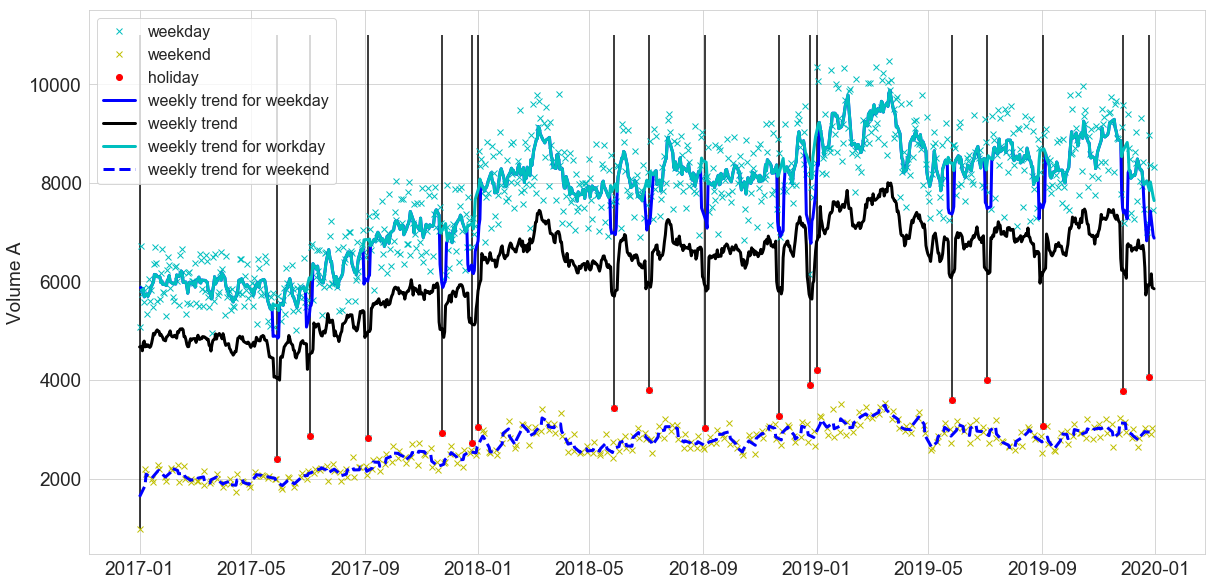

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df[df['is_weekday']==1]['date_val'],df[df['is_weekday']==1]['volume_A'],'cx',label='weekday')
plt.plot(df[df['is_weekday']==0]['date_val'],df[df['is_weekday']==0]['volume_A'],'yx',label='weekend')
plt.plot(df[(df['is_holiday']==1)&(df['is_weekday']==1)]['date_val'],df[(df['is_holiday']==1)&(df['is_weekday']==1)]['volume_A'],'ro',label='holiday')
plt.plot(df[df['is_weekday']==1]['date_val'],resAweekday.trend.values,'b-',linewidth=3.0,label='weekly trend for weekday')
plt.plot(df['date_val'],resA.trend.values,'k-',linewidth=3.0,label='weekly trend')
plt.plot(df[df['is_workday']==1]['date_val'],resAworkday.trend.values,'c-',linewidth=3.0,label='weekly trend for workday')
plt.plot(df[df['is_weekday']==0]['date_val'],resAweekend.trend.values,'b--',linewidth=3.0,label='weekly trend for weekend')
#plt.plot(df[df['is_workday']==0]['date_val'],resAworkend.trend.values,'y-',linewidth=3.0,label='weekly trend for non-workdays')
plt.vlines(df[df['is_holiday']==1]['date_val'],[11000]*len(df[df['is_holiday']==1]['date_val']),df[df['is_holiday']==1]['volume_A'])
plt.legend(loc=2, prop={'size': 16})
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume A",size=19)
plt.show()


### Plot smoothed data for customer A 
* window size=22 (number of workdays for first month in 2017)

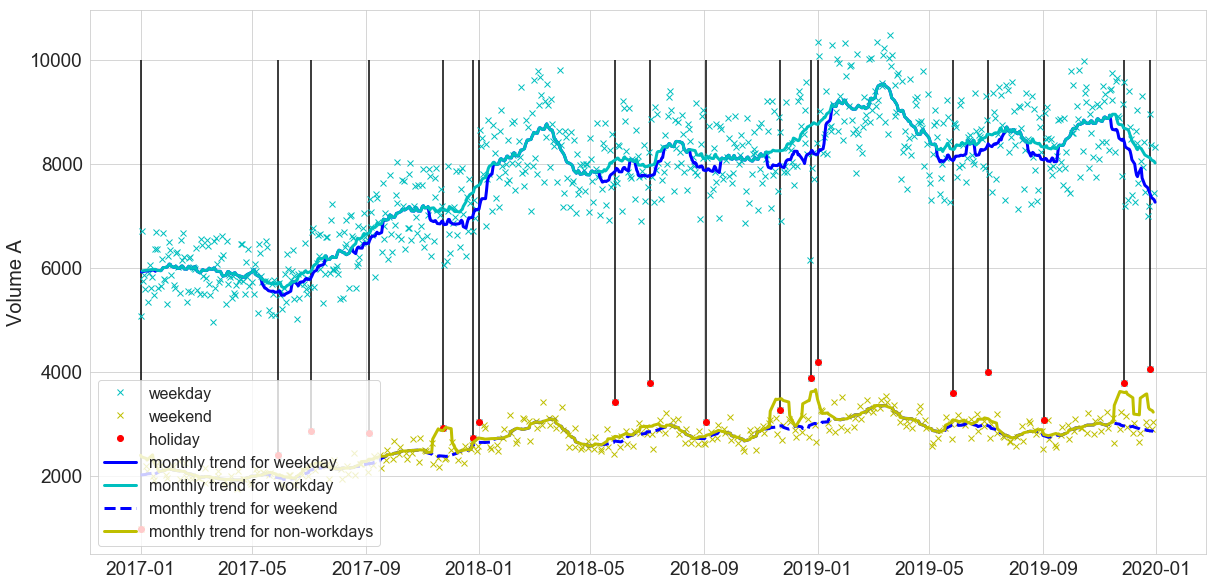

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df[df['is_weekday']==1]['date_val'],df[df['is_weekday']==1]['volume_A'],'cx',label='weekday')
plt.plot(df[df['is_weekday']==0]['date_val'],df[df['is_weekday']==0]['volume_A'],'yx',label='weekend')
plt.plot(df[df['is_holiday']==1]['date_val'],df[df['is_holiday']==1]['volume_A'],'ro',label='holiday')
plt.plot(df[df['is_weekday']==1]['date_val'],resAweekdaymon.trend.values,'b-',linewidth=3.0,label='monthly trend for weekday')
plt.plot(df[df['is_workday']==1]['date_val'],resAworkdaymon.trend.values,'c-',linewidth=3.0,label='monthly trend for workday')
plt.plot(df[df['is_weekday']==0]['date_val'],resAweekendmon.trend.values,'b--',linewidth=3.0,label='monthly trend for weekend')
plt.plot(df[df['is_workday']==0]['date_val'],resAworkendmon.trend.values,'y-',linewidth=3.0,label='monthly trend for non-workdays')
plt.vlines(df[df['is_holiday']==1]['date_val'],[10000]*len(df[df['is_holiday']==1]['date_val']),df[df['is_holiday']==1]['volume_A'])
plt.legend(loc=3, prop={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume B",size=19)
#plt.xlabel('Date')
plt.ylabel('Volume A', fontsize=20)#,rotation=0)
plt.show()


### Plot smoothed data for customer B
* window size=22 (number of workdays for first month in 2017)

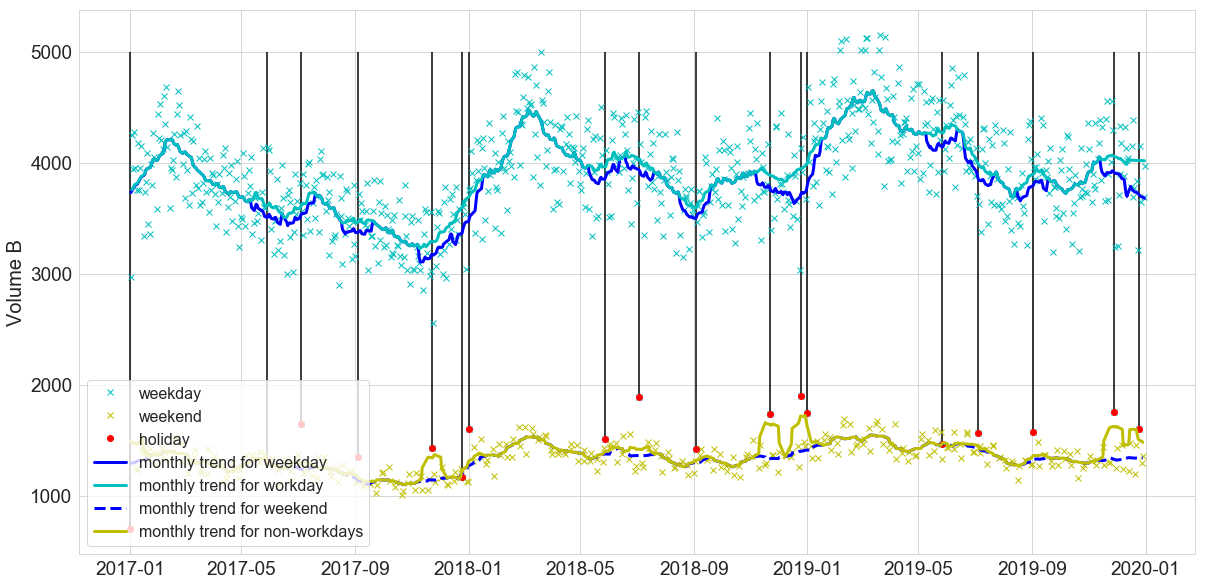

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df[df['is_weekday']==1]['date_val'],df[df['is_weekday']==1]['volume_B'],'cx',label='weekday')
plt.plot(df[df['is_weekday']==0]['date_val'],df[df['is_weekday']==0]['volume_B'],'yx',label='weekend')
plt.plot(df[df['is_holiday']==1]['date_val'],df[df['is_holiday']==1]['volume_B'],'ro',label='holiday')
plt.plot(df[df['is_weekday']==1]['date_val'],resBweekdaymon.trend.values,'b-',linewidth=3.0,label='monthly trend for weekday')
plt.plot(df[df['is_workday']==1]['date_val'],resBworkdaymon.trend.values,'c-',linewidth=3.0,label='monthly trend for workday')
plt.plot(df[df['is_weekday']==0]['date_val'],resBweekendmon.trend.values,'b--',linewidth=3.0,label='monthly trend for weekend')
plt.plot(df[df['is_workday']==0]['date_val'],resBworkendmon.trend.values,'y-',linewidth=3.0,label='monthly trend for non-workdays')
plt.vlines(df[df['is_holiday']==1]['date_val'],[5000]*len(df[df['is_holiday']==1]['date_val']),df[df['is_holiday']==1]['volume_B'])
plt.legend(loc=3, prop={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume B",size=19)
#plt.xlabel('Date')
plt.ylabel('Volume B', fontsize=20)#,rotation=0)
plt.show()



### Plot smoothed data for customer C 
* window size=22 (number of workdays for first month in 2017)

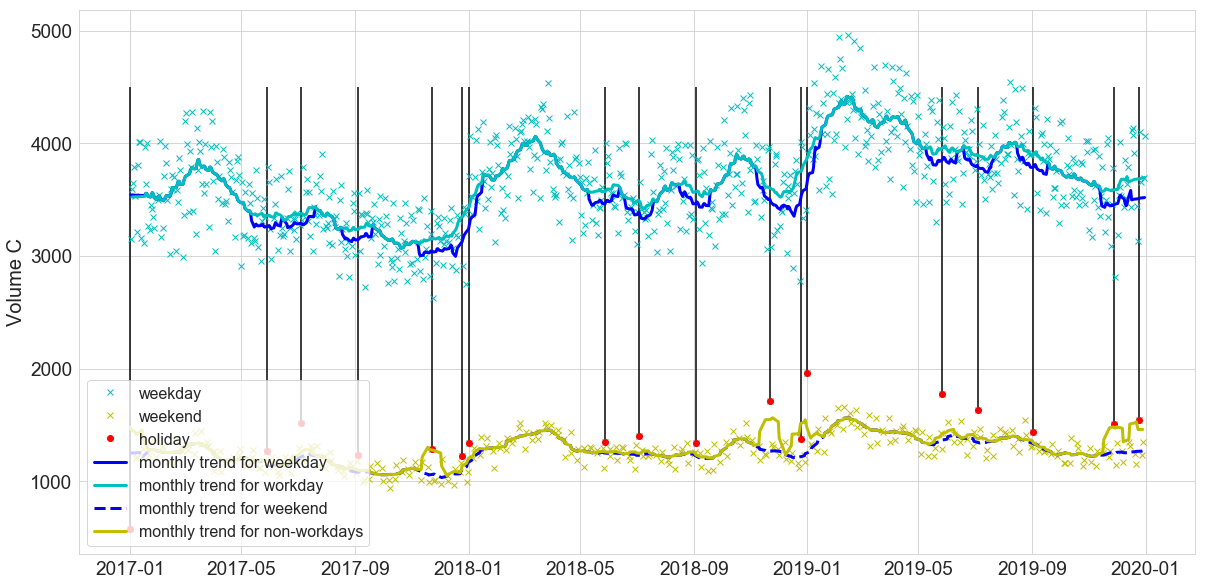

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df[df['is_weekday']==1]['date_val'],df[df['is_weekday']==1]['volume_C'],'cx',label='weekday')
plt.plot(df[df['is_weekday']==0]['date_val'],df[df['is_weekday']==0]['volume_C'],'yx',label='weekend')
plt.plot(df[df['is_holiday']==1]['date_val'],df[df['is_holiday']==1]['volume_C'],'ro',label='holiday')
plt.plot(df[df['is_weekday']==1]['date_val'],resCweekdaymon.trend.values,'b-',linewidth=3.0,label='monthly trend for weekday')
plt.plot(df[df['is_workday']==1]['date_val'],resCworkdaymon.trend.values,'c-',linewidth=3.0,label='monthly trend for workday')
plt.plot(df[df['is_weekday']==0]['date_val'],resCweekendmon.trend.values,'b--',linewidth=3.0,label='monthly trend for weekend')
plt.plot(df[df['is_workday']==0]['date_val'],resCworkendmon.trend.values,'y-',linewidth=3.0,label='monthly trend for non-workdays')
plt.vlines(df[df['is_holiday']==1]['date_val'],[4500]*len(df[df['is_holiday']==1]['date_val']),df[df['is_holiday']==1]['volume_C'])
plt.legend(loc=3, prop={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume A",size=19)
#plt.xlabel('Date')
plt.ylabel('Volume C', fontsize=20)#,rotation=0)
plt.show()

### Daily Trend for Customer A

Text(0, 0.5, 'Volume A')

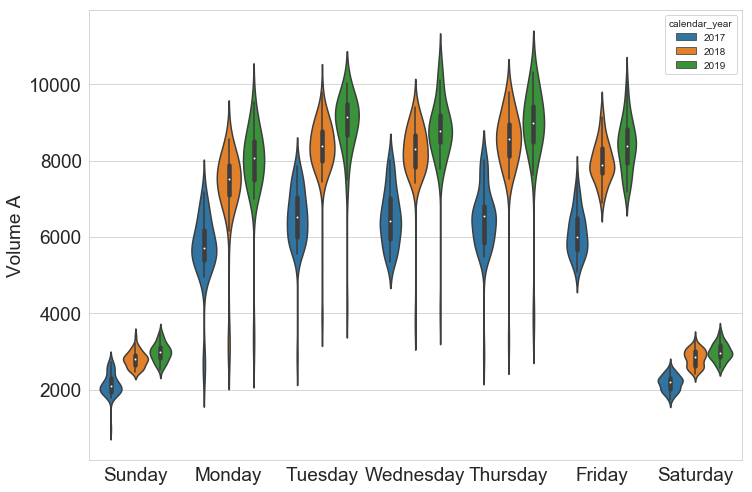

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Day_of_week", y="volume_A", hue='calendar_year',data=df)#[df['is_holiday']==0])
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume A",size=19)

### Daily Trend for Customer B

Text(0, 0.5, 'Volume B')

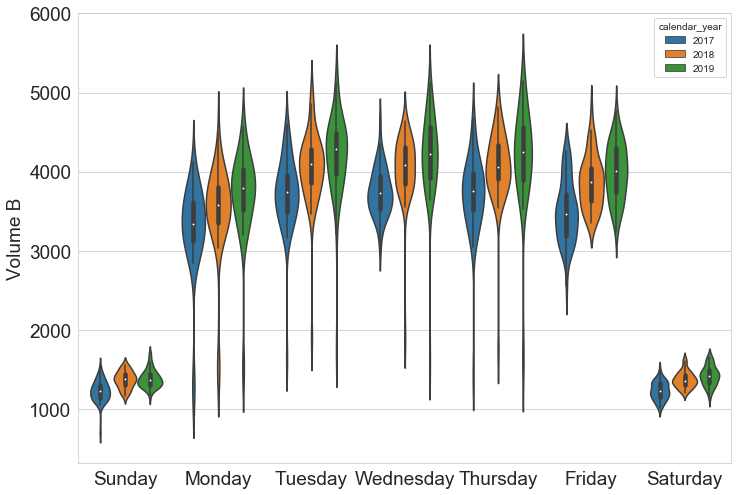

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Day_of_week", y="volume_B", hue='calendar_year',data=df)#[df['is_holiday']==0])
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume B",size=19)

### Daily Trend for Customer C

Text(0, 0.5, 'Volume C')

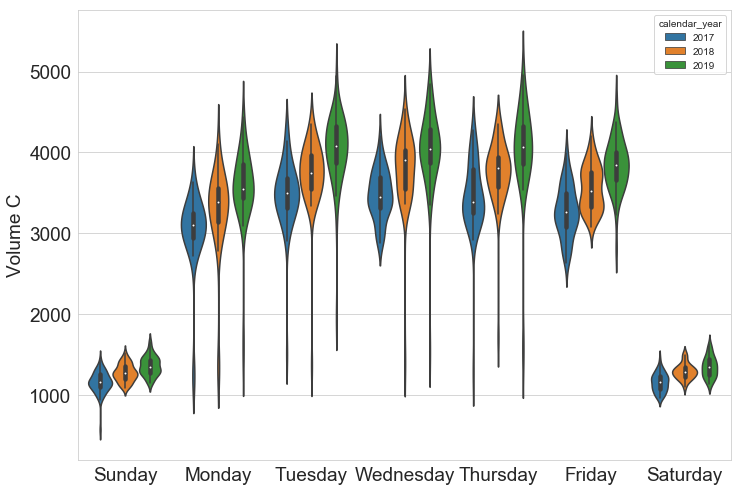

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Day_of_week", y="volume_C", hue='calendar_year',data=df)#[df['is_holiday']==0])
plt.xticks(size=19)
plt.yticks(size=19)
plt.xlabel("",size=19)
plt.ylabel("Volume C",size=19)

## Study in interactions between customer behavior on Monthly level
* smooth data use window size=22
* normalize on year mean to bring data for all three customers to the same table

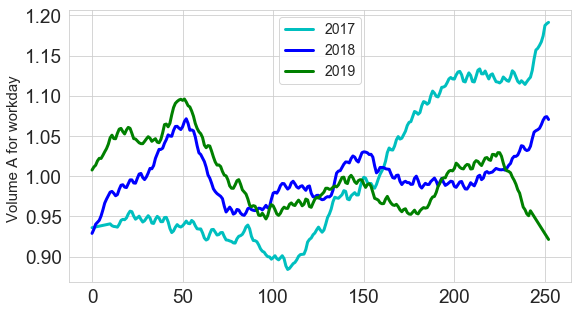

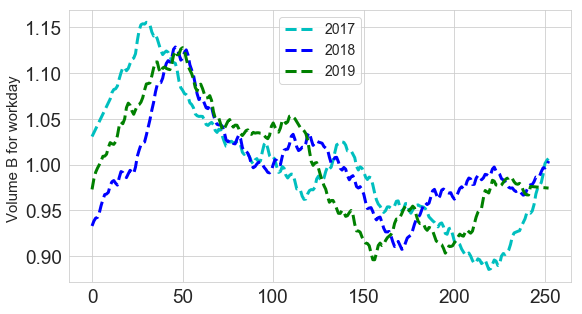

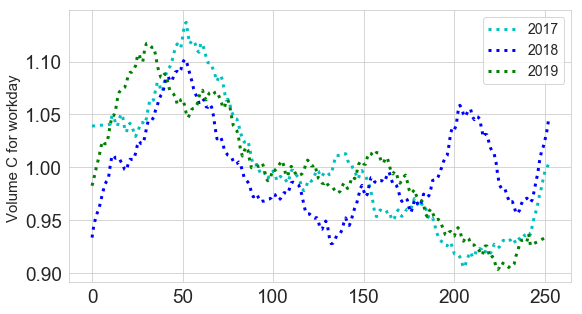

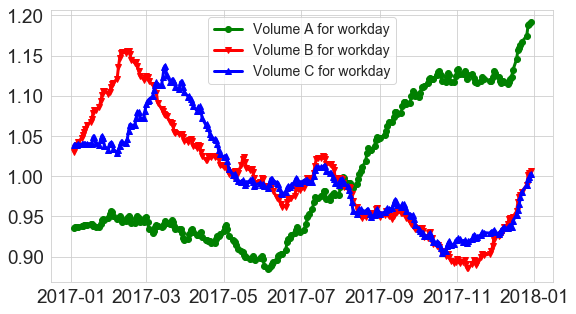

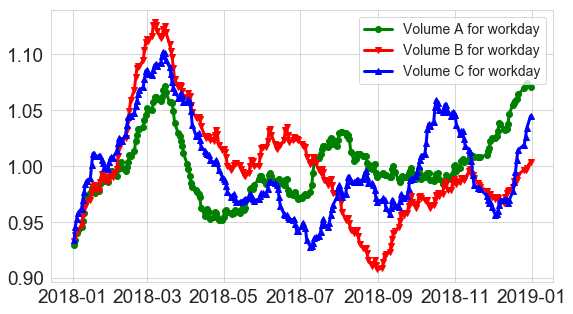

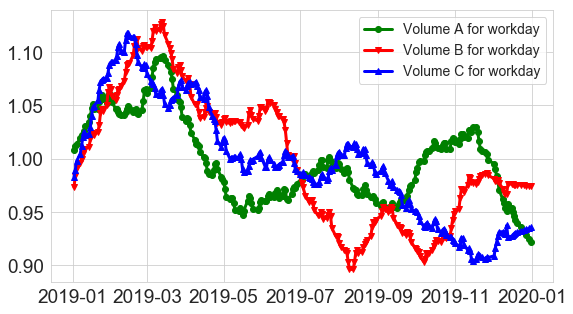

In [20]:
plt.plot(resAworkdaymon.trend.values[:253]/(resAworkdaymon.trend.values[:253].mean()),
         'c-',linewidth=3.0,label='2017')
plt.plot(resAworkdaymon.trend.values[253:253*2]/(resAworkdaymon.trend.values[253:253*2].mean()),
         'b-',linewidth=3.0,label='2018')
plt.plot(resAworkdaymon.trend.values[253*2:]/(resAworkdaymon.trend.values[253*2:].mean()),
         'g-',linewidth=3.0,label='2019')
#plt.plot(resBworkdaymon.trend.values[:253]/(resBworkdaymon.trend.values[:253].mean()),'c--',linewidth=3.0,label='Volume A for workday')
#plt.plot(resBworkdaymon.trend.values[253:253*2]/(resBworkdaymon.trend.values[253:253*2].mean()),'b--',linewidth=3.0,label='Volume A for workday')
#plt.plot(resBworkdaymon.trend.values[253*2:-1]/(resBworkdaymon.trend.values[253*2:-1].mean()),'g--',linewidth=3.0,label='Volume A for workday')
plt.legend(loc='upper center', prop={'size': 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.ylabel("Volume A for workday ",size=15)
plt.show()
#plt.plot(resAworkdaymon.trend.values[:253]/(resAworkdaymon.trend.values[:253].mean()),'c-',linewidth=3.0,label='Volume A for workday')
#plt.plot(resAworkdaymon.trend.values[253:253*2]/(resAworkdaymon.trend.values[253:253*2].mean()),'b-',linewidth=3.0,label='Volume A for workday')
#plt.plot(resAworkdaymon.trend.values[253*2:-1]/(resAworkdaymon.trend.values[253*2:-1].mean()),'g-',linewidth=3.0,label='Volume A for workday')
plt.plot(resBworkdaymon.trend.values[:253]/(resBworkdaymon.trend.values[:253].mean()),
         'c--',linewidth=3.0,label='2017')
plt.plot(resBworkdaymon.trend.values[253:253*2]/(resBworkdaymon.trend.values[253:253*2].mean()),
         'b--',linewidth=3.0,label='2018')
plt.plot(resBworkdaymon.trend.values[253*2:]/(resBworkdaymon.trend.values[253*2:].mean()),
         'g--',linewidth=3.0,label='2019')
plt.legend(loc='upper center', prop={'size': 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.ylabel("Volume B for workday ",size=15)
plt.show()

plt.plot(resCworkdaymon.trend.values[:253]/(resCworkdaymon.trend.values[:253].mean()),'c:',
         linewidth=3.0,label='2017')
plt.plot(resCworkdaymon.trend.values[253:253*2]/(resCworkdaymon.trend.values[253:253*2].mean()),
         'b:',linewidth=3.0,label='2018')
plt.plot(resCworkdaymon.trend.values[253*2:-1]/(resCworkdaymon.trend.values[253*2:-1].mean()),
         'g:',linewidth=3.0,label='2019')
plt.legend(loc='upper right', prop={'size': 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.ylabel("Volume C for workday ",size=15)
plt.show()

plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2017)]['date_val'],
         resAworkdaymon.trend.values[:253]/(resAworkdaymon.trend.values[:253].mean()),
         #'c-',
         'go-',linewidth=3.0,label='Volume A for workday')
plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2017)]['date_val'],
         resBworkdaymon.trend.values[:253]/(resBworkdaymon.trend.values[:253].mean()),
         #'c--',
         'rv-',linewidth=3.0,label='Volume B for workday')
plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2017)]['date_val'],
         resCworkdaymon.trend.values[:253]/(resCworkdaymon.trend.values[:253].mean()),
         #'c:',
         'b^-',linewidth=3.0,label='Volume C for workday')
plt.legend(loc='upper center', prop={'size': 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.show()

plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2018)]['date_val'],
         resAworkdaymon.trend.values[253:253*2]/(resAworkdaymon.trend.values[253:253*2].mean()),
         #'b-',
         'go-',linewidth=3.0,label='Volume A for workday')
plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2018)]['date_val'],
         resBworkdaymon.trend.values[253:253*2]/(resBworkdaymon.trend.values[253:253*2].mean()),
         #'b--',
         'rv-',linewidth=3.0,label='Volume B for workday')
plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2018)]['date_val'],
         resCworkdaymon.trend.values[253:253*2]/(resCworkdaymon.trend.values[253:253*2].mean()),
         #'b:',
         'b^-',linewidth=3.0,label='Volume C for workday')
plt.legend(loc=1, prop={'size': 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.show()

plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2019)]['date_val'],
         resAworkdaymon.trend.values[253*2:]/(resAworkdaymon.trend.values[253*2:].mean()),
         #'g-',
         'go-',linewidth=3.0,label='Volume A for workday')
plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2019)]['date_val'],
         resBworkdaymon.trend.values[253*2:]/(resBworkdaymon.trend.values[253*2:].mean()),
         #'g--',
         'rv-',linewidth=3.0,label='Volume B for workday')
plt.plot(df[(df['is_workday']==1)&(df['calendar_year']==2019)]['date_val'],
         resCworkdaymon.trend.values[253*2:]/(resCworkdaymon.trend.values[253*2:].mean()),
         #'g:',
         'b^-',linewidth=3.0,label='Volume C for workday')
plt.legend(loc=1, prop={'size': 14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)#, rotation=90)
plt.xticks(size=19)
plt.yticks(size=19)
plt.show()

### Misc. Trend decompositions

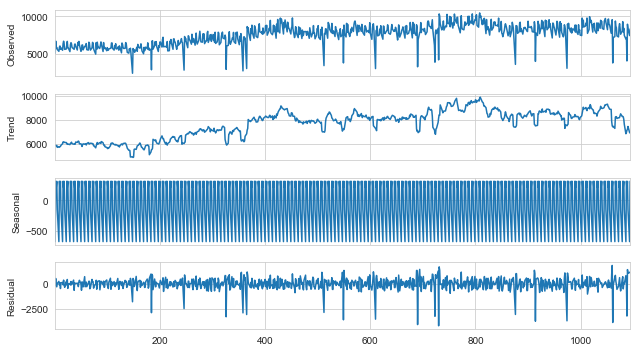

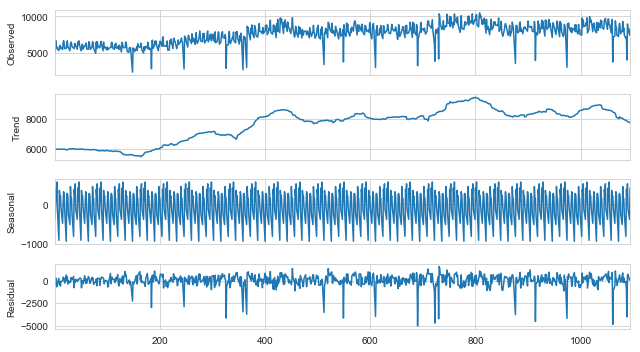

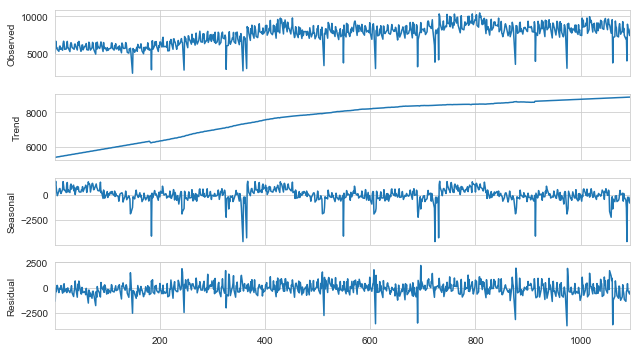

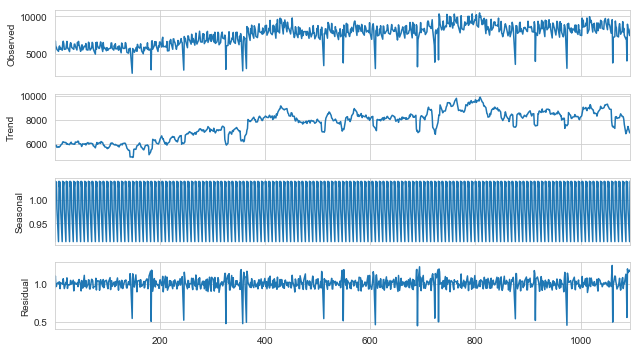

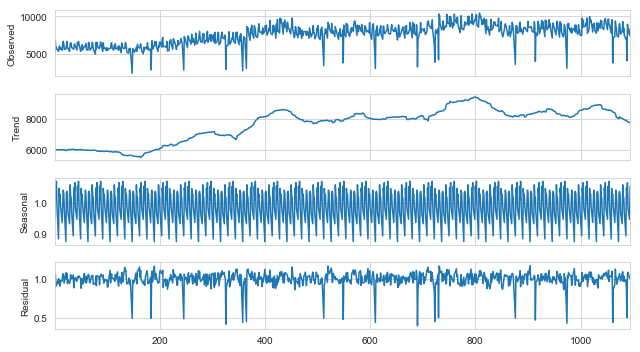

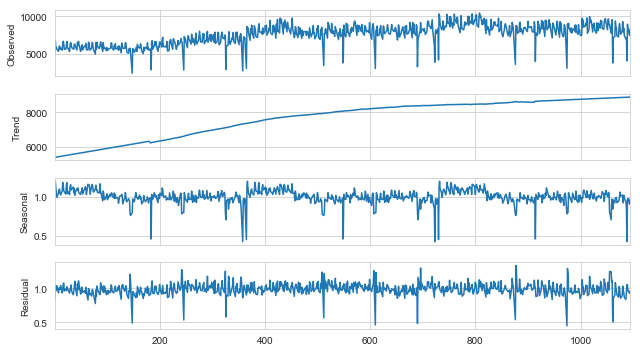

In [21]:
seasonal_plotter('volume_A',"weekday",1)

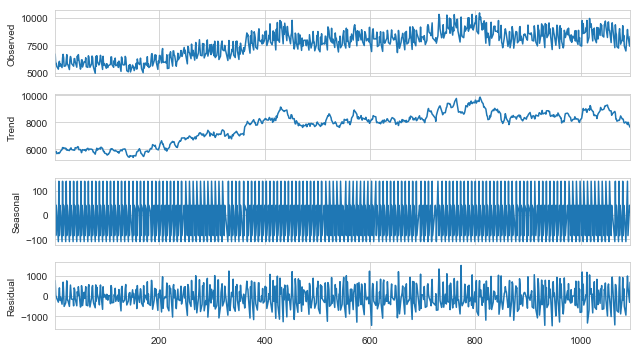

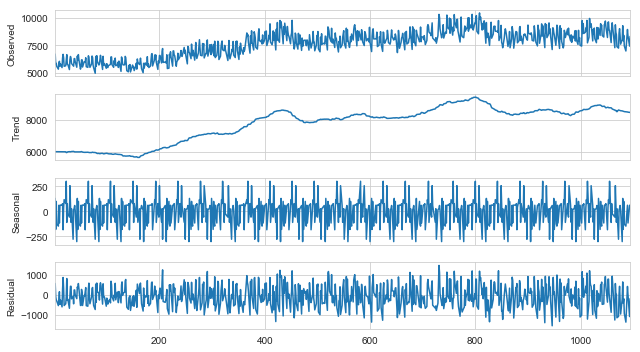

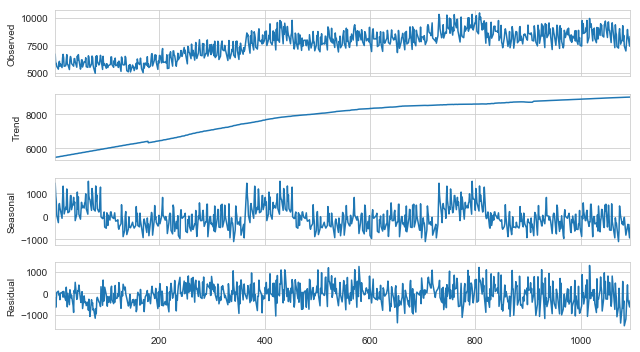

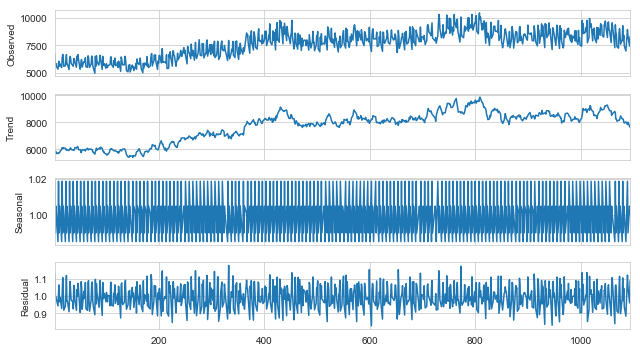

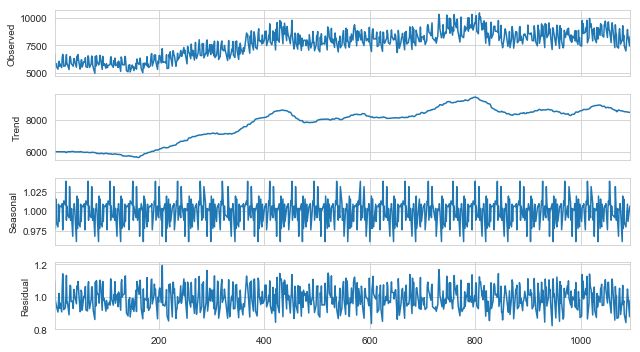

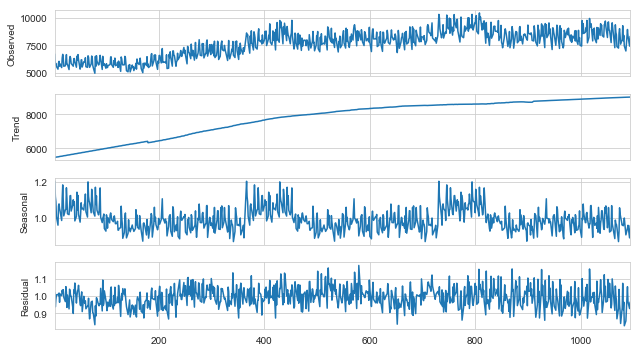

In [22]:
seasonal_plotter('volume_A',"workday",1)

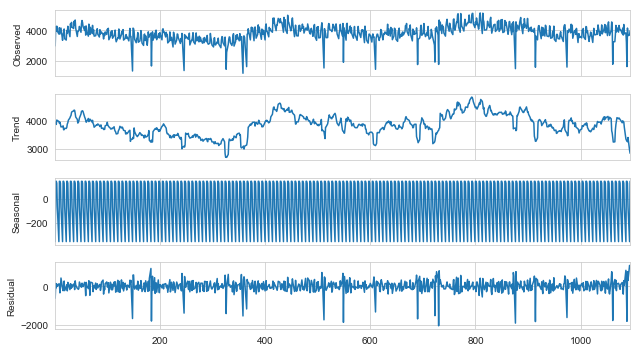

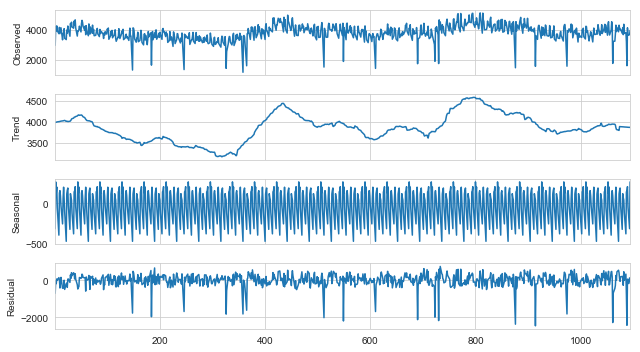

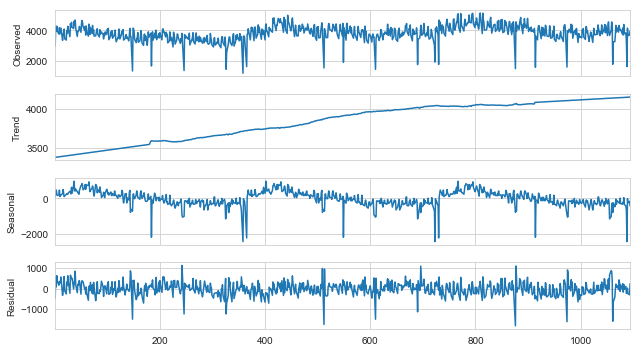

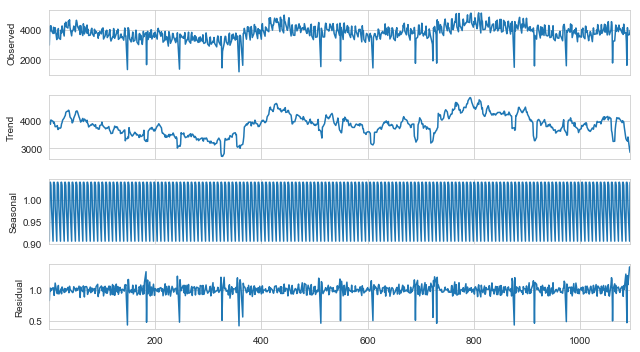

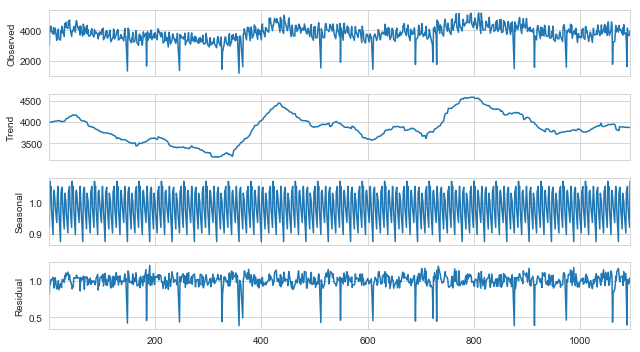

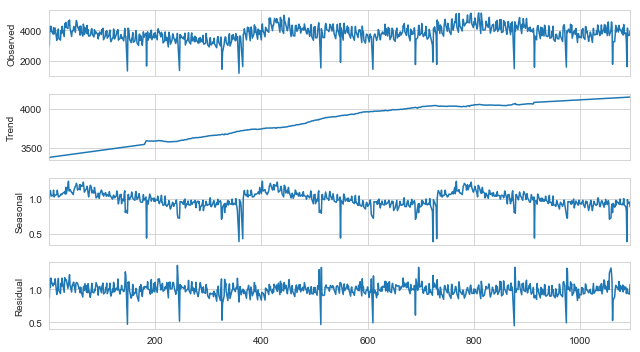

In [23]:
seasonal_plotter('volume_B',"weekday",1)

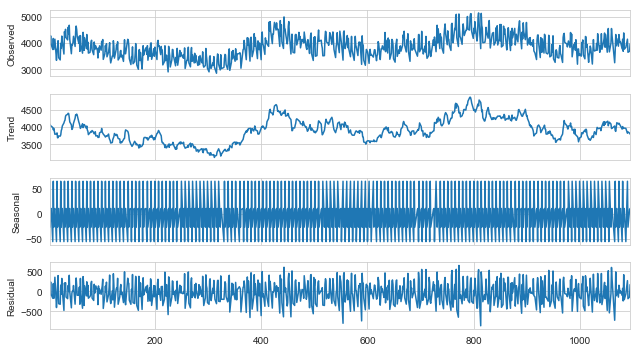

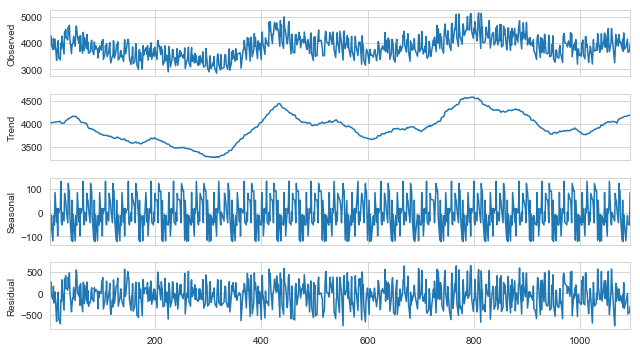

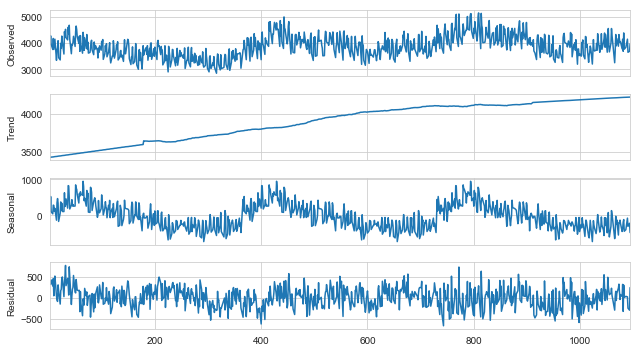

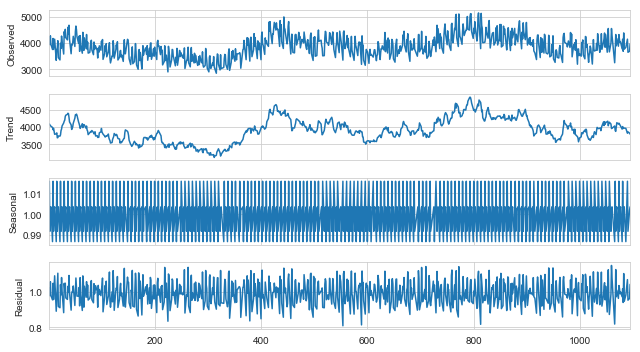

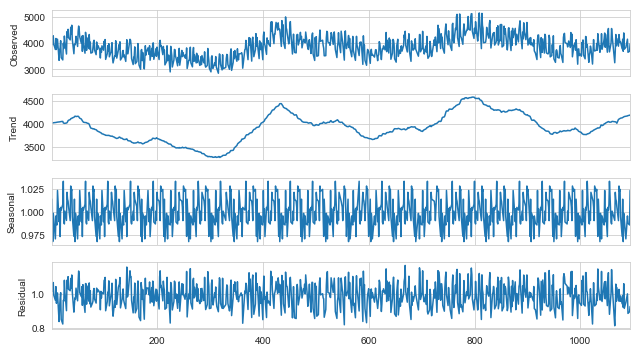

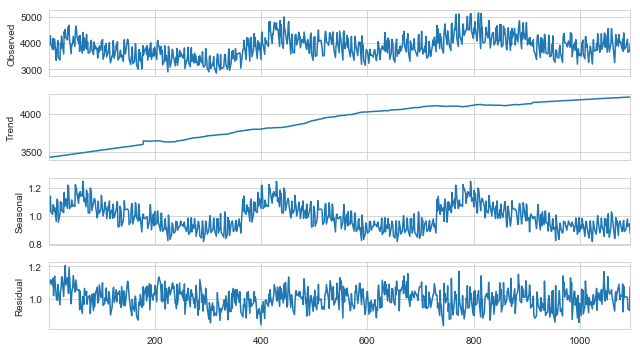

In [24]:
seasonal_plotter('volume_B',"workday",1)

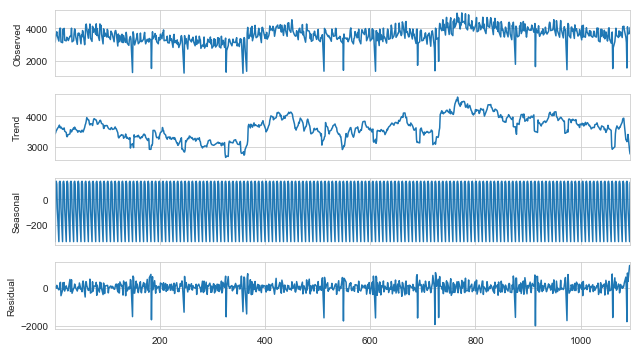

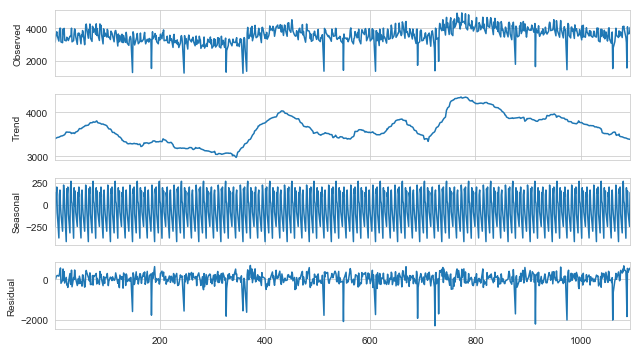

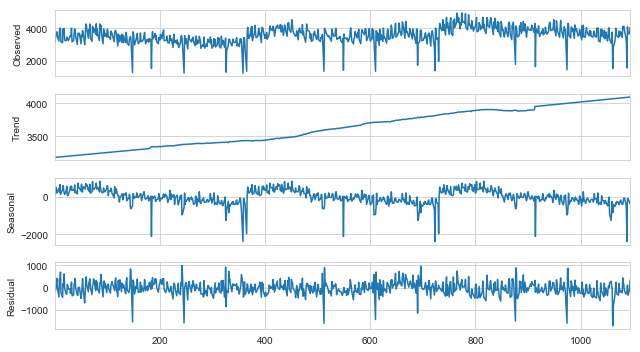

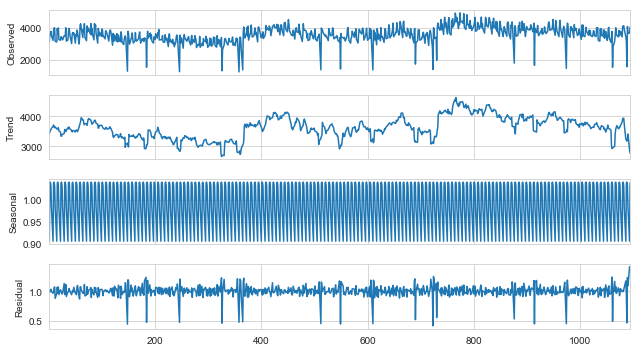

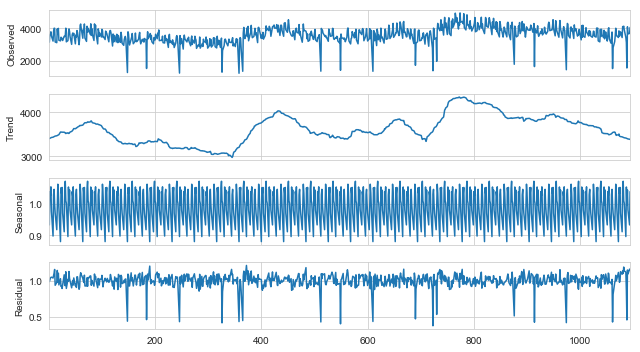

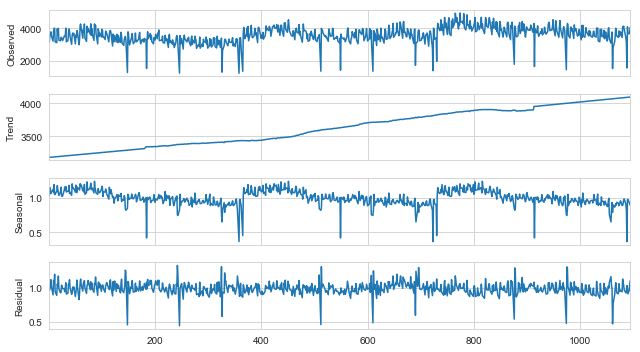

In [25]:
seasonal_plotter('volume_C',"weekday",1)

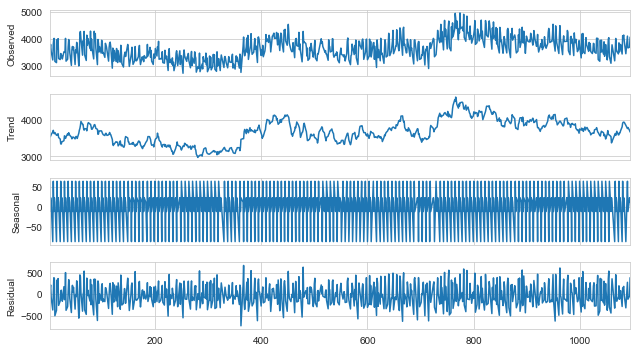

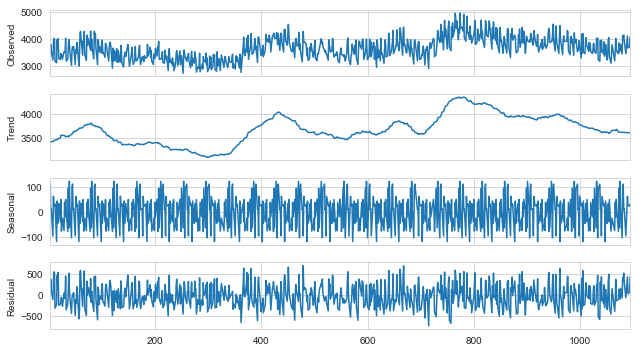

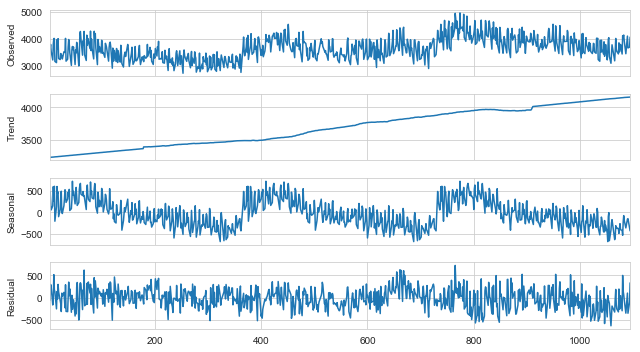

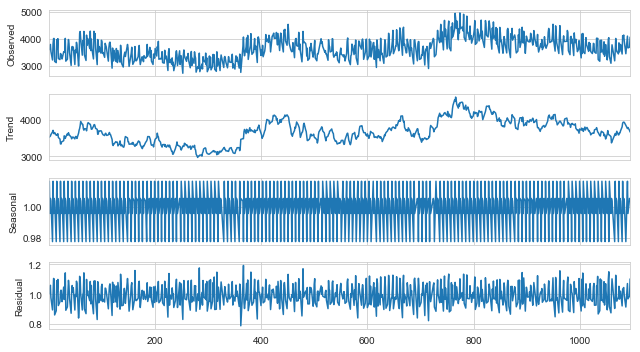

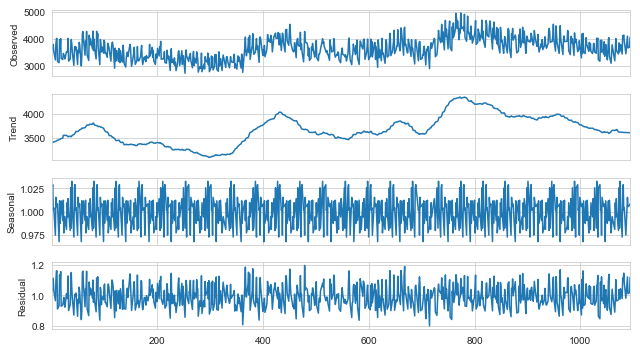

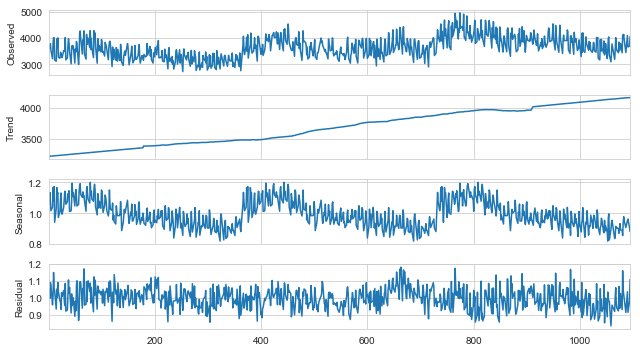

In [26]:
seasonal_plotter('volume_C',"workday",1)

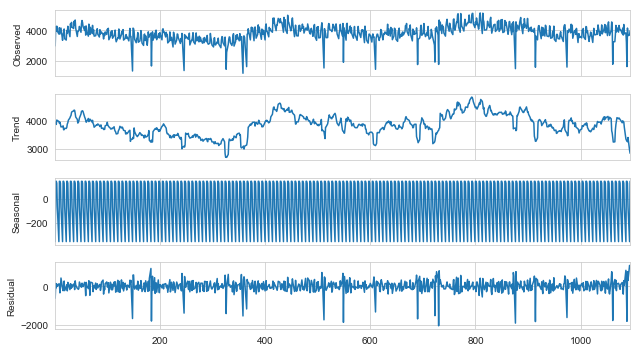

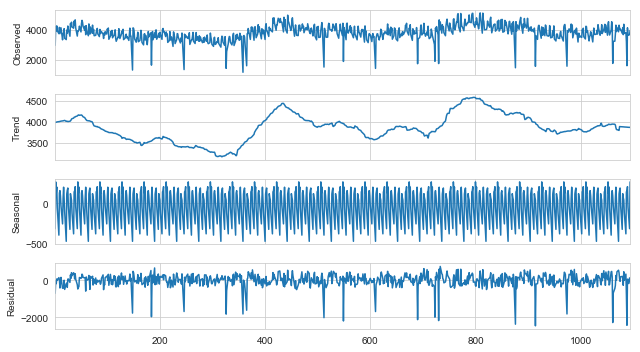

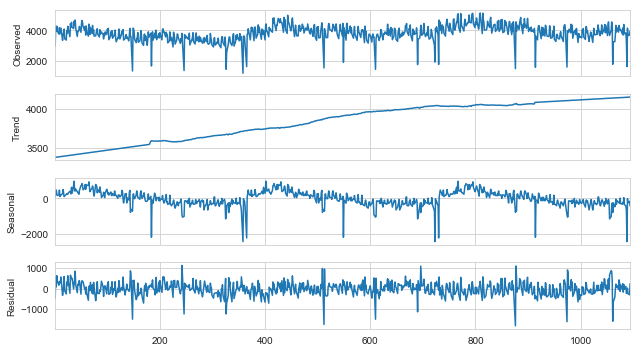

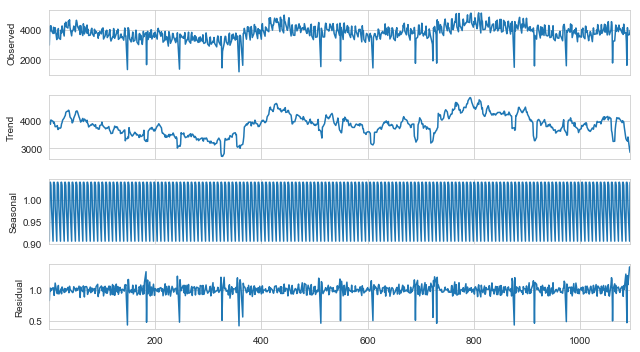

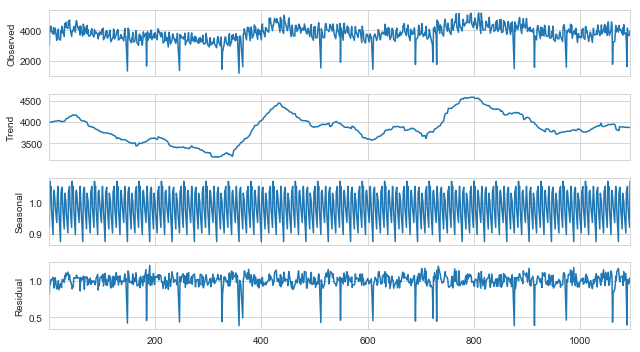

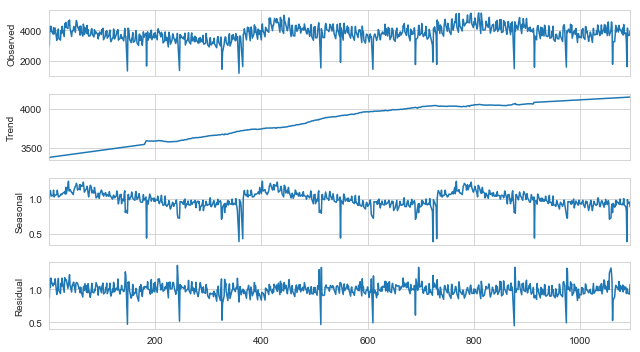

In [27]:
seasonal_plotter('volume_B',"weekday",1)

### Correlations between time series

In [28]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau
print(pearsonr(df['volume_A'],df['volume_B']))
print(pearsonr(df['volume_A'],df['volume_C']))
print(pearsonr(df['volume_B'],df['volume_C']))
print(spearmanr(df['volume_A'],df['volume_B']))
print(spearmanr(df['volume_A'],df['volume_C']))
print(spearmanr(df['volume_B'],df['volume_C']))
print(kendalltau(df['volume_A'],df['volume_B']))
print(kendalltau(df['volume_A'],df['volume_C']))
print(kendalltau(df['volume_B'],df['volume_C']))

(0.9281465719052999, 0.0)
(0.9333266894050672, 0.0)
(0.9657851325718008, 0.0)
SpearmanrResult(correlation=0.8141327225924808, pvalue=2.8423585662690242e-260)
SpearmanrResult(correlation=0.8340879429921573, pvalue=1.2121578392481238e-284)
SpearmanrResult(correlation=0.8573538294641653, pvalue=1.597002e-317)
KendalltauResult(correlation=0.6210673964944247, pvalue=7.089145451651222e-208)
KendalltauResult(correlation=0.6389832345904748, pvalue=6.441312874832555e-220)
KendalltauResult(correlation=0.6716883368559811, pvalue=1.0272118106806667e-242)


In [29]:
df[['volume_A','volume_B','volume_C']].corr(method='pearson')

volume_A  volume_B  volume_C
volume_A  1.000000  0.928147  0.933327
volume_B  0.928147  1.000000  0.965785
volume_C  0.933327  0.965785  1.000000